<a href="https://colab.research.google.com/github/tankalasaiambica/LinearRegression-all-in-one/blob/main/linear_regression_all_in_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OLS Regression

In [1]:
# importing required libaries
import numpy as np
import pandas as pd
import statsmodels.api as sm
# loading the dataset
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0) 
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [2]:
df.shape # data shape

(16, 7)

In [3]:
df.info() # data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1947 to 1962
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GNP.deflator  16 non-null     float64
 1   GNP           16 non-null     float64
 2   Unemployed    16 non-null     float64
 3   Armed.Forces  16 non-null     float64
 4   Population    16 non-null     float64
 5   Year          16 non-null     int64  
 6   Employed      16 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.0 KB


In [4]:
df.describe().transpose() # data describes

,count,mean,std,min,25%,50%,75%,max
GNP.deflator,16.0,101.681250,10.791553,83.000,94.5250,100.6000,111.2500,116.900
GNP,16.0,387.698437,99.394938,234.289,317.8810,381.4270,454.0855,554.894
Unemployed,16.0,319.331250,93.446425,187.000,234.8250,314.3500,384.2500,480.600
Armed.Forces,16.0,260.668750,69.591960,145.600,229.8000,271.7500,306.0750,359.400
Population,16.0,117.424000,6.956102,107.608,111.7885,116.8035,122.3040,130.081
Year,16.0,1954.500000,4.760952,1947.000,1950.7500,1954.5000,1958.2500,1962.000
Employed,16.0,65.317000,3.511968,60.171,62.7125,65.5040,68.2905,70.551


In [5]:
# segregating data
y = df.Employed  
X = df.GNP  
X = sm.add_constant(X)  # Adds a constant term to the predictor
X.head()

,const,GNP
1947,1.0,234.289
1948,1.0,259.426
1949,1.0,258.054
1950,1.0,284.599
1951,1.0,328.975


# fitting OLS model

In [6]:
est=sm.OLS(y, X)
est = est.fit()
est.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           8.36e-12
Time:                        13:19:00   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
est.params # Coefficent and intercept

Intercept    51.843590
GNP           0.034752
dtype: float64

Populating the interactive namespace from numpy and matplotlib


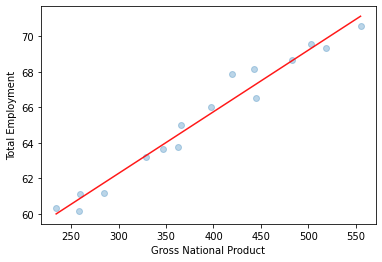

In [8]:
%matplotlib inline 
# We pick 100 hundred points equally spaced from the min to the max 
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis] 
X_prime = sm.add_constant(X_prime) 
# add constant as we did before 
# Now we calculate the predicted values 
y_hat = est.predict(X_prime) 
plt.scatter(X.GNP, y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("Gross National Product") 
plt.ylabel("Total Employment") 
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9) 
# Add the regression line, colored in red Populating the interactive namespace from numpy and matplotlib

In [9]:
# import formula api as alias smf import statsmodels.formula.api as smf 
# formula: response ~ predictors 
import statsmodels.formula.api as smf
est = smf.ols(formula='Employed ~ GNP', data=df).fit() 
est.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           8.36e-12
Time:                        13:19:00   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

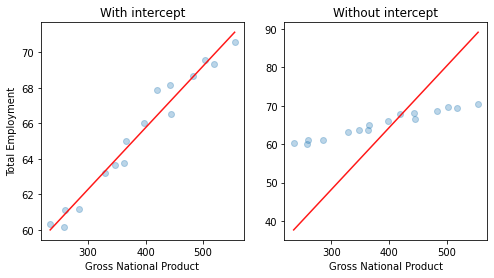

In [10]:
# Fit the no-intercept model 
est_no_int = smf.ols(formula='Employed ~ GNP - 1', data=df).fit() 
# We pick 100 hundred points equally spaced from the min to the max 
X_prime_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)}) 
X_prime_1 = sm.add_constant(X_prime_1) 
# add constant as we did before 
y_hat_int = est.predict(X_prime_1) 
y_hat_no_int = est_no_int.predict(X_prime_1) 
fig = plt.figure(figsize=(8,4)) 
splt = plt.subplot(121) 
splt.scatter(X.GNP, y, alpha=0.3) # Plot the raw data plt.ylim(30, 100) 
# Set the y-axis to be the same 
plt.xlabel("Gross National Product") 
plt.ylabel("Total Employment") 
plt.title("With intercept") 
splt.plot(X_prime[:, 1], y_hat_int, 'r', alpha=0.9) # Add the regression line, colored in red 
splt = plt.subplot(122) 
splt.scatter(X.GNP, y, alpha=0.3) 
# Plot the raw data 
plt.xlabel("Gross National Product") 
plt.title("Without intercept") 
splt.plot(X_prime[:, 1], y_hat_no_int, 'r', alpha=0.9) # Add the regression line, colored in red

# linear regression using sklearn libary

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [17]:
data = pd.read_csv("/content/test_scores.csv")

In [18]:
data.head()

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83


In [26]:
X = data[['math']]
y = data[['cs']]

In [27]:
X

,math
0,92
1,56
2,88
3,70
4,80
5,49
6,65
7,35
8,66
9,67


In [28]:
y

,cs
0,98
1,68
2,81
3,80
4,83
5,52
6,66
7,30
8,68
9,73


# fitting linearRegression model

In [29]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [30]:
print("model.intercept",model.intercept_)
print("model.coef_",model.coef_)

[1.91521931]
[[1.01773624]]


#gradient descent

In [63]:
def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        # print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr,cost_previous

In [64]:
x1 = data.math
y1 = data.cs

In [65]:
m, b,c = gradient_descent(x1,y1)
print("Using gradient descent function: Coef {} Intercept {} cost {}".format(m, b,c))

Using gradient descent function: Coef 1.0390524972633637 Intercept 0.4045913382155772 cost 31.735517659560408


# Using Ridge Lasso ElasticNet

In [88]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [86]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)
# summarize first few lines
print(dataframe.head())

        0     1     2   3      4      5   ...  8      9     10      11    12    13
0  0.00632  18.0  2.31   0  0.538  6.575  ...   1  296.0  15.3  396.90  4.98  24.0
1  0.02731   0.0  7.07   0  0.469  6.421  ...   2  242.0  17.8  396.90  9.14  21.6
2  0.02729   0.0  7.07   0  0.469  7.185  ...   2  242.0  17.8  392.83  4.03  34.7
3  0.03237   0.0  2.18   0  0.458  6.998  ...   3  222.0  18.7  394.63  2.94  33.4
4  0.06905   0.0  2.18   0  0.458  7.147  ...   3  222.0  18.7  396.90  5.33  36.2

[5 rows x 14 columns]


In [87]:
# summarize shape
print(dataframe.shape)

(506, 14)


In [70]:
dataframe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [74]:
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]


In [75]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [76]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: 13, Length: 506, dtype: float64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


linearRegression

In [83]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

4.284146230476762
0.7431215456774967
5.641775532184672
0.7215519718844158


Ridge

In [90]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

4.284155886912394
0.7431203876717136
5.641693818189576
0.7215600377622231


Lasso

In [91]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

4.288565297379853
0.7425913357029048
5.641926307796153
0.7215370887213186


ElasticNet

In [92]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

4.331255416837342
0.7374411284037687
5.676197404857107
0.7181438455456866


we can select the best model using MSE and R2 metrics